# Implementacija modela za prepoznavanje broja prstiju na ruci pomoću konvolucijskih neuronskih mreža
Kolegij: Neuronske mreže i duboko učenje
Autor: Krešimir Špehar (0165079422)

In [ ]:
#Povezivanje slika na google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importanje biblioteka

import tensorflow as tf
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [ ]:
target_size = (128, 128)  #Promjena u veličini slika
num_classes = 5
batch_size = 32           #Batch za treniranje
epochs = 30


data_dir = '/content/drive/MyDrive/project_folder/train'        #Putanja do foldera slika

def load_and_preprocess_images(directory, target_size):         #Učitavanje i obrada slika
    X = []
    y = []
    class_labels = sorted(os.listdir(directory))

    for label_idx, class_label in enumerate(class_labels):
        class_dir = os.path.join(directory, class_label)
        for img_filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img)
            img_array /= 255.0
            X.append(img_array)
            y.append(label_idx)

    X = np.array(X)
    y = to_categorical(y, num_classes=num_classes)

    return X, y

X, y = load_and_preprocess_images(data_dir, target_size)          #Pozivanje funkcije iznad te spremanje u X i y

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)         #Podjela slika u training, validation i test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

input_shape = X_train.shape[1:]       #Oblik slike bez veličine batcha

In [ ]:
#Treći model
model = Sequential()

model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(target_size[0], target_size[1], 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), 1, activation='relu'))       #Promjenjen na 32 filtera
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu'))       #Promjenjen na 64 filtera
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))                                  #Dodan još jedan dropout '0.25'

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


early_stopping = EarlyStopping(patience=10, restore_best_weights=True)          #Definiran 'early stopping' te 'checkpoint'
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)             #Dodan Adam optimizator s learning ratom od '0.001'

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])   #Compile modela

In [ ]:
#Treća faza
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)

#Evalucija modela na test podacima
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
model.summary()     #Prikaz strukture i parametara modela

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)      

In [ ]:
#Četvrti model
model = Sequential()

model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(target_size[0], target_size[1], 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                              #Promjenjen dropout sa 50% na 25% '0.25'

model.add(Dense(num_classes, activation='softmax'))

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Četvrta faza

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_137 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_137 (MaxPooli  (None, 63, 63, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_138 (Conv2D)         (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_138 (MaxPooli  (None, 30, 30, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_139 (Conv2D)         (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_139 (MaxPooli  (None, 14, 14, 64)     

In [ ]:
#Konačni model, peti
#Dodan HeNormal
model = Sequential()

model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(target_size[0], target_size[1], 3), kernel_initializer=HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), 1, activation='relu', kernel_initializer=HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu', kernel_initializer=HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu', kernel_initializer=HeNormal()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), 1, activation='relu', kernel_initializer=HeNormal()))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

early_stopping = EarlyStopping(patience=15, restore_best_weights=True)     #Promjenjen patience sa 15 na 10
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

Epoch 1/30
29/29 [==============================] - 3s 34ms/step - loss: 1.7075 - accuracy: 0.2013 - val_loss: 1.6171 - val_accuracy: 0.1739
Epoch 2/30
29/29 [==============================] - 1s 28ms/step - loss: 1.5886 - accuracy: 0.2644 - val_loss: 1.5923 - val_accuracy: 0.2348
Epoch 3/30
29/29 [==============================] - 1s 27ms/step - loss: 1.5868 - accuracy: 0.2688 - val_loss: 1.5705 - val_accuracy: 0.2435
Epoch 4/30
29/29 [==============================] - 1s 25ms/step - loss: 1.5590 - accuracy: 0.2960 - val_loss: 1.5859 - val_accuracy: 0.2783
Epoch 5/30
29/29 [==============================] - 1s 28ms/step - loss: 1.5356 - accuracy: 0.3058 - val_loss: 1.5105 - val_accuracy: 0.3391
Epoch 6/30
29/29 [==============================] - 1s 23ms/step - loss: 1.4643 - accuracy: 0.3624 - val_loss: 1.5259 - val_accuracy: 0.3217
Epoch 7/30
29/29 [==============================] - 1s 25ms/step - loss: 1.4103 - accuracy: 0.3906 - val_loss: 1.4891 - val_accuracy: 0.3478
Epoch 8/30
29

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_152 (Conv2D)         (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_152 (MaxPooli  (None, 63, 63, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_153 (Conv2D)         (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_153 (MaxPooli  (None, 30, 30, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_154 (Conv2D)         (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_154 (MaxPooli  (None, 14, 14, 64)     

1/1 [==============================] - 0s 23ms/step
Class 1: 0.00
Class 2: 0.06
Class 3: 0.00
Class 4: 0.94
Class 5: 0.00
1/1 [==============================] - 0s 18ms/step
Class 1: 0.00
Class 2: 1.00
Class 3: 0.00
Class 4: 0.00
Class 5: 0.00
1/1 [==============================] - 0s 18ms/step
Class 1: 0.00
Class 2: 0.00
Class 3: 0.00
Class 4: 0.00
Class 5: 1.00
1/1 [==============================] - 0s 21ms/step
Class 1: 0.00
Class 2: 0.03
Class 3: 0.01
Class 4: 0.95
Class 5: 0.01
1/1 [==============================] - 0s 21ms/step
Class 1: 0.00
Class 2: 0.01
Class 3: 0.46
Class 4: 0.40
Class 5: 0.12


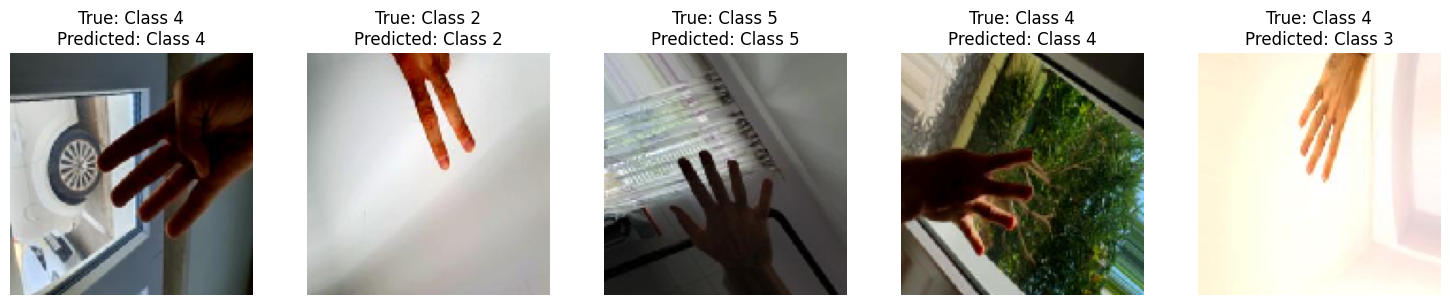

In [ ]:
#Prikaz testnih slika sa predikcijama modela
num_samples_to_display = 5      #Broj slika koje ce biti prikazane
sample_indices = np.random.randint(0, len(X_test), num_samples_to_display)

fig, axes = plt.subplots(1, num_samples_to_display, figsize=(15, 3))   #Stvaranje slike i velicina plota

for i in range(num_samples_to_display):
    sample_image = X_test[sample_indices[i]]        #Uzimanje slike
    true_label = y_test[sample_indices[i]]          #Uzimanje stvarne labele slike
    sample_image = np.expand_dims(sample_image, axis=0)

    predictions = model.predict(sample_image)        #Predikcija modela
    predicted_class = np.argmax(predictions)         #Uzima najveci index od vrijednosti

    true_class_label = np.argmax(true_label) + 1
    predicted_class_label = predicted_class + 1      #Dodavanje na klasu, +1 zbog klasa jer počinju od 1 a ne 0

    axes[i].imshow(sample_image[0])
    axes[i].set_title(f"True: Class {true_class_label}\nPredicted: Class {predicted_class_label}")
    axes[i].axis('off')                 #Prikazivanje slike

    for j, prob in enumerate(predictions[0]):
        print(f"Class {j + 1}: {prob:.2f}")

plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 5ms/step
Test accuracy: 69.57%


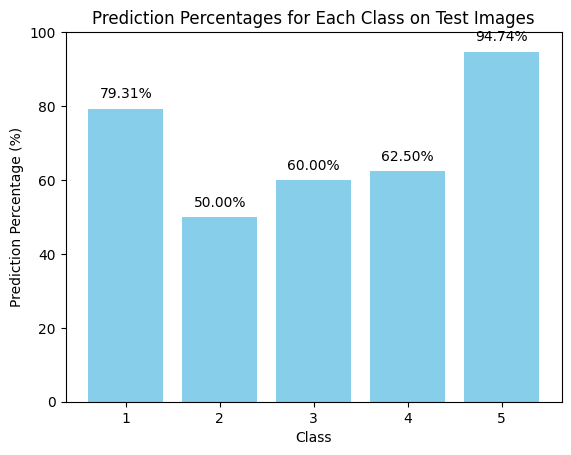

In [ ]:
#Prikaz predikcija po klasama u postotcima
predictions = model.predict(X_test)     #Predikcije za slike u testnom skupu

true_class_labels = np.argmax(y_test, axis=1) + 1   #Pronalazak stvarnih labela, istinitih

predicted_class_labels = np.argmax(predictions, axis=1) + 1       #Predvidene labele od modela

correct_predictions = (true_class_labels == predicted_class_labels)     #Usporedivanje
accuracy = np.sum(correct_predictions) / len(correct_predictions) * 100     #Racunanje tocnosti modela

print(f"Test accuracy: {accuracy:.2f}%")

class_accuracy = []         #Lista koja sadrzava tocnost po klasama
for class_label in range(1, num_classes + 1):           #Prolazak kroz sve klase i racunanje tocnosti
    class_indices = np.where(true_class_labels == class_label)
    class_correct_predictions = correct_predictions[class_indices]
    class_accuracy.append(np.sum(class_correct_predictions) / len(class_indices[0]) * 100)

class_labels = list(range(1, num_classes + 1))        #Lista oznaka od 1 do 5

plt.bar(class_labels, class_accuracy, tick_label=class_labels, color='skyblue')       #Plotiranje
plt.xlabel('Class')
plt.ylabel('Prediction Percentage (%)')
plt.title('Prediction Percentages for Each Class on Test Images')
plt.ylim(0, 100)

for i, acc in enumerate(class_accuracy):
    plt.text(class_labels[i], acc + 2, f"{acc:.2f}%", ha='center', va='bottom')

plt.show()


In [ ]:
#Funkcija za plotiranje training i validation lossa te training i validation accuracya
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()